# 2 - Find all wells in a PWA or PWRA

In [1]:
import dew_gwdata

db = dew_gwdata.sageodata()

Let's get all the wells in the McLaren Vale PWA.

First thing, how do we know how to refer exactly to this PWA?

We can find out using a convienent pandas Series called ``lookups`` which exists on the SAGeodataConnection.

In [3]:
db.lookups

field
pwa                                  Musgrave
pwa                           Southern Basins
pwa                              McLaren Vale
pwa                  Northern Adelaide Plains
pwa                                     Noora
pwa                                 Padthaway
pwa                          Central Adelaide
pwa                                 Far North
pwa                                    Mallee
pwa                  Peake, Roby and Sherlock
pwa                       Tintinara-Coonalpyn
pwa                     Lower Limestone Coast
pwa                              Angas-Bremer
pwa                                   Tatiara
pwra               Eastern Mount Lofty Ranges
pwra                                  Baroota
pwra           Marne River and Saunders Creek
pwra                           Barossa Valley
pwra                             Clare Valley
pwra               Western Mount Lofty Ranges
nrm                            Eyre Peninsula
nrm               South Aust

Now we know it's called "McLaren Vale". So let's run the query!

In [4]:
wells = db.drillhole_details_by_pwa("McLaren Vale")

Remember, all queries return pandas DataFrames.

In [5]:
wells.head()

,well_id,dh_no,unit_long,unit_hyphen,obs_no,dh_name,easting,northing,zone,latitude,longitude,aquifer
0,6627-14065,248218,662714065,6627-14065,None,None,284375.43,6099095.85,54,-35.228034,138.630669,Nds
1,6527-568,26564,652700568,6527-568,None,None,269314.30,6095440.70,54,-35.257609,138.464288,Qpa
2,WLG044,26565,652700569,6527-569,WLG044,None,270906.82,6096136.56,54,-35.251705,138.481972,Te2
3,6527-570,26566,652700570,6527-570,None,None,271210.32,6096107.73,54,-35.252035,138.485297,Teb
4,WLG032,26568,652700572,6527-572,WLG032,STREAM SAMPLING,271538.26,6094829.79,54,-35.263621,138.488543,None


Let's have a look at the Prescribed Water Resource Areas:

In [6]:
db.lookups["pwra"]

pwra        Eastern Mount Lofty Ranges
pwra                           Baroota
pwra    Marne River and Saunders Creek
pwra                    Barossa Valley
pwra                      Clare Valley
pwra        Western Mount Lofty Ranges
Name: value, dtype: object

In [7]:
wells = db.drillhole_details_by_pwra("Marne River and Saunders Creek")

In [8]:
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 12 columns):
well_id        1569 non-null object
dh_no          1569 non-null int64
unit_long      1569 non-null int64
unit_hyphen    1569 non-null object
obs_no         101 non-null object
dh_name        213 non-null object
easting        1569 non-null float64
northing       1569 non-null float64
zone           1569 non-null int64
latitude       1569 non-null float64
longitude      1569 non-null float64
aquifer        1114 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 116.5+ KB


Now let's say we want to get the construction details for all of these wells.

In [9]:
details = db.construction_events(wells)

In [10]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 618
Data columns (total 66 columns):
well_id                 1891 non-null object
dh_no                   1891 non-null int64
unit_long               1891 non-null int64
unit_hyphen             1891 non-null object
obs_no                  142 non-null object
dh_name                 219 non-null object
easting                 1891 non-null float64
northing                1891 non-null float64
zone                    1891 non-null int64
latitude                1891 non-null float64
longitude               1891 non-null float64
aquifer                 1426 non-null object
construction_aquifer    365 non-null object
completion_no           1891 non-null int64
completion_date         1749 non-null datetime64[ns]
event_type              1891 non-null object
start_depth             1891 non-null float64
total_depth             1340 non-null float64
current_depth           1567 non-null float64
final_depth             1254 no

For fun...

let's see how many wells have a construction event in each year.

First we need to filter for only event_types "C" - others are survey events.

In [11]:
details2 = details[details.event_type == "C"]
ts = details.groupby(details.completion_date.dt.year).well_id.count()

In [12]:
ts

completion_date
1909.0     1
1910.0     1
1914.0     5
1921.0     1
1925.0     1
1926.0     1
1927.0     3
1930.0     1
1934.0     3
1936.0     1
1938.0     3
1939.0     4
1940.0     8
1941.0    14
1942.0     1
1943.0     1
1944.0     2
1945.0     1
1946.0     2
1947.0     3
1948.0    91
1949.0     7
1950.0    85
1951.0    15
1952.0    16
1953.0    13
1954.0    21
1955.0     4
1956.0     2
1957.0     8
          ..
1990.0    70
1991.0    12
1992.0    27
1993.0    41
1994.0    35
1995.0    32
1996.0    30
1997.0    34
1998.0    29
1999.0    45
2000.0    24
2001.0    25
2002.0    23
2003.0    30
2004.0    29
2005.0    19
2006.0     5
2007.0     7
2008.0    13
2009.0    15
2010.0     7
2011.0     8
2012.0    14
2013.0     5
2014.0    13
2015.0    12
2016.0    16
2017.0     9
2018.0     8
2019.0     5
Name: well_id, Length: 92, dtype: int64

That's a lot of data - let's make a bar chart to visualise it more easily

First import matplotlib and change the DPI to make things bigger.

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.rcParams["figure.dpi"] = 120

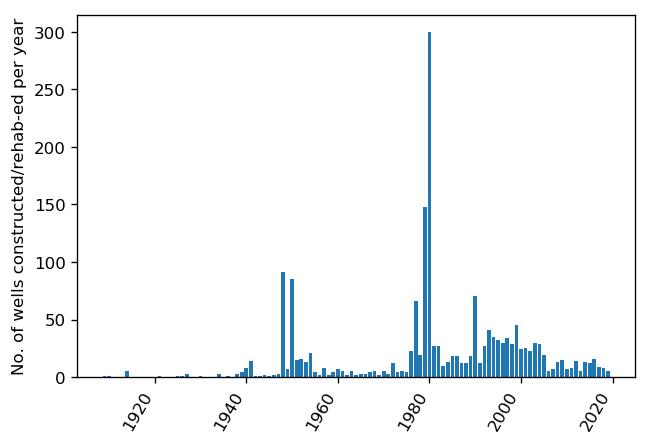

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ts.index.values, ts.values)
_ = plt.setp(ax.get_xticklabels(), rotation=60, ha="right")
_ = ax.set_ylabel("No. of wells constructed/rehab-ed per year")

In [19]:
# Ignore this cell! It's just here so that you can see the figure on Gitea.
fig.savefig("nb2_fig1.png")

![](http://envtelem04:3000/groundwater/dew_gwdata/raw/branch/master/notebooks/nb2_fig1.png)

Wow, 1979 was a big year